<a href="https://colab.research.google.com/github/snmouhcine/Google_Stock_Price_Prediction_LSTM/blob/master/Google_Stock_Price_Predictions_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import io 
from google.colab import files
uploaded = files.upload()

Saving GOOG_Train.csv to GOOG_Train (1).csv


In [3]:
dataset_train = pd.read_csv(io.BytesIO(uploaded['GOOG_Train.csv']))
training_set = dataset_train.iloc[:, 1:2].values
training_set


array([[ 569.765686],
       [ 570.284302],
       [ 578.411987],
       ...,
       [1309.859985],
       [1315.      ],
       [1307.119995]])

In [0]:
from sklearn.preprocessing import MinMaxScaler 
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [0]:
X_train = []
y_train = []
for i in range(60, 1323):
  X_train.append(training_set_scaled[i-60:i, 0])
  y_train.append(training_set_scaled[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [0]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [7]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout


Using TensorFlow backend.


In [8]:
regressor = Sequential()

In [9]:

regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))


regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))


regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))


regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))


regressor.add(Dense(units = 1))




Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [10]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [11]:
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/20





1263/1263 [==============================] - 17s 14ms/step - loss: 0.0379
Epoch 2/20
1263/1263 [==============================] - 14s 11ms/step - loss: 0.0039
Epoch 3/20
1263/1263 [==============================] - 14s 11ms/step - loss: 0.0039
Epoch 4/20
1263/1263 [==============================] - 14s 11ms/step - loss: 0.0040
Epoch 5/20
1263/1263 [==============================] - 14s 11ms/step - loss: 0.0030
Epoch 6/20
1263/1263 [==============================] - 14s 11ms/step - loss: 0.0031
Epoch 7/20
1263/1263 [==============================] - 14s 11ms/step - loss: 0.0033
Epoch 8/20
1263/1263 [==============================] - 14s 11ms/step - loss: 0.0031
Epoch 9/20
1263/1263 [==============================] - 14s 11ms/step - loss: 0.0033
Epoch 10/20
1263/1263 [==============================] - 14s 11ms/step - loss: 0.0034
Epoch 11/20
1263/1263 [========================

In [12]:
from google.colab import files
uploaded_test = files.upload()

Saving GOOG_Test.csv to GOOG_Test (2).csv


In [0]:
dataset_test = pd.read_csv(io.BytesIO(uploaded_test['GOOG_Test.csv']))
real_stock_price = dataset_test.iloc[:, 1:2].values

In [0]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)


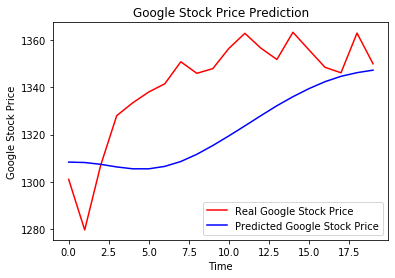

In [15]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()